In [72]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os.path as osp

In [89]:
dst = "../analysis/csv_files/cifar10/original/branches/original_summary.csv"
dst_100 = "../analysis/csv_files/cifar100/original/branches/cifar100_summary.csv"

dst_l = "../analysis/csv_files/cifar10/original/branches/original.csv"
dst_100_l = "../analysis/csv_files/cifar100/original/branches/cifar100.csv"
destination = "../analysis/figures"

In [90]:
dst_df = pd.read_csv(dst)
dst_100_df = pd.read_csv(dst_100)

In [91]:
dst_l_df = pd.read_csv(dst_l)
dst_100_l_df = pd.read_csv(dst_100_l)

In [147]:
def to_drop(df, drop, axis):
    if drop:
        return df.drop(labels=drop, axis=axis)
    else:
        return df
    
def savefig(dst, title):
    if dst is not None:
        if title is None:
            title = "anon"
        title = title + ".png"
        plt.tight_layout()
        plt.savefig(osp.join(dst, title))

def plot(m, drop_c:list=None, dst:str=None, title:str=None):
    m = to_drop(m, drop_c, 1)
    g = sns.FacetGrid(pd.melt(m, 'mask_no'), col="variable", sharey=False)
    g.map(sns.lineplot, 'mask_no', 'value')
    if title is not None:
        g.fig.subplots_adjust(top=0.75) # adjust the Figure in rp
        g.fig.suptitle(title)    
    savefig(dst, title)
        
def plot_layers(m, drop_c:list=None, drop_r:list=None, dst:str=None, title:str=None):
    m = to_drop(m, drop_c, 1)
    m = to_drop(m, drop_r, 0)
    
    m = m.sort_values(by=['mask_no', 'layer',])
    g = sns.FacetGrid(pd.melt(m, ['mask_no', 'layer']), row="variable", col='layer', sharey='row', height=2.2, aspect=1.75)
    g.map(sns.lineplot, 'mask_no', 'value')
    if title is not None:
        g.fig.subplots_adjust(top=0.75) # adjust the Figure in rp
        g.fig.suptitle(title)    
    savefig(dst, title)
    
def line_plot(m:pd.DataFrame, x:str, y:str, hue:str, dst:str=None, title:str=None, filter_by:list=None):
    # c = sns.color_palette("flare", as_cmap=True)
    if filter_by:
        masks = None
        for cond in filter_by:
            mask = m.layer.str.contains(cond)
            if masks is None: masks=mask
            else:
                masks |= mask
        m = m[masks]
    g= sns.lineplot(data=m,x=x,y=y,hue=hue,)
    if title:
        g.set(title=title)
    savefig(dst, title)
    plt.clf()
    
    

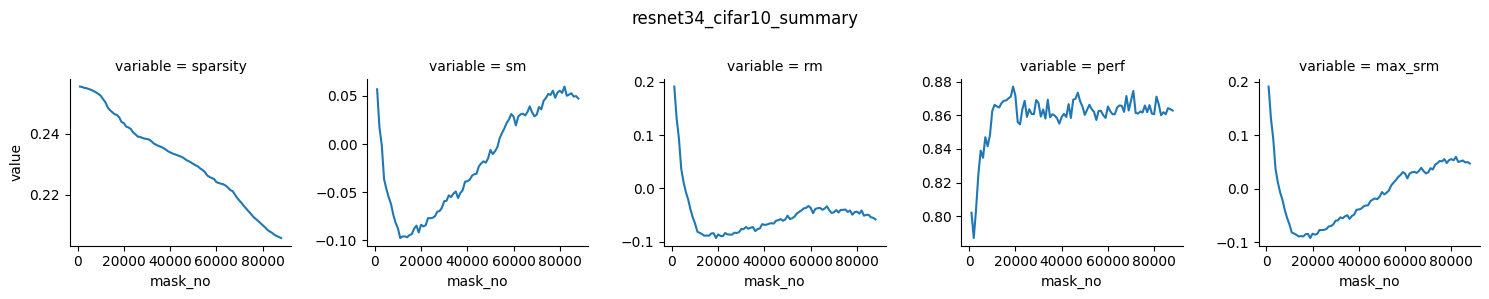

In [84]:
dst_df['max_srm'] = dst_df[['sm', 'rm']].max(axis=1)
plot(dst_df, drop_c=['t1m', 't1w', 'sw', 'rw'], dst=destination, title="resnet34_cifar10_summary")

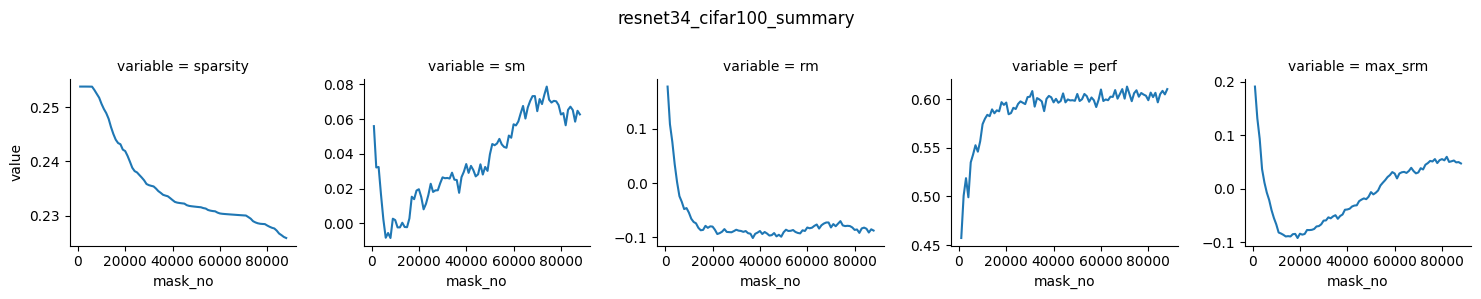

In [100]:
dst_100_df['max_srm'] = dst_df[['sm', 'rm']].max(axis=1)
plot(dst_100_df, drop_c=['t1m', 't1w', 'sw', 'rw', 'copeland_score', 'compatibility', 'overlap_coefs'], dst=destination, title="resnet34_cifar100_summary")

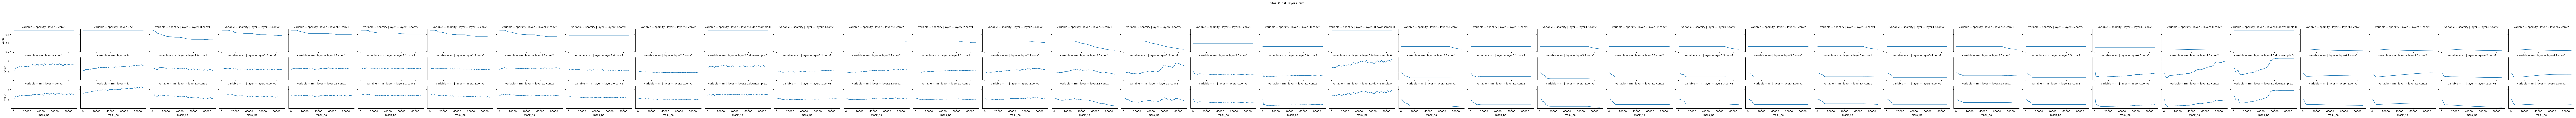

In [107]:
plot_layers(dst_l_df, drop_c=['t1m', 't1w', 'rw', 'sw', 'perf'], dst=destination, title="cifar10_dst_layers_rsm")

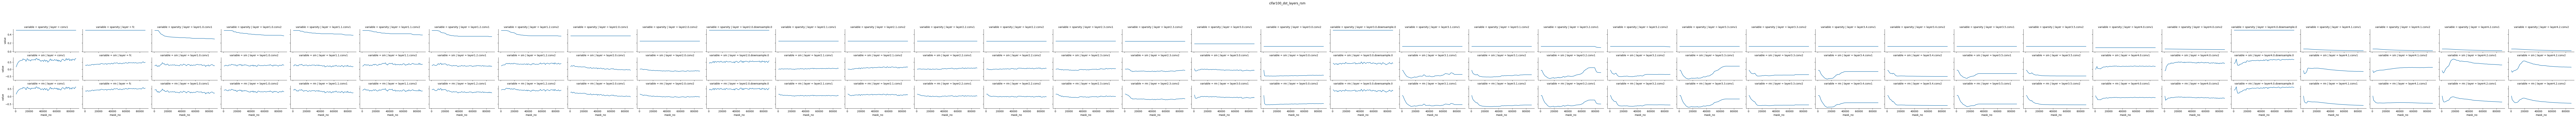

In [109]:
plot_layers(dst_100_l_df, drop_c=['t1m', 't1w', 'perf', 'copeland_score', 'compatibility', 'overlap_coefs', 'rw', 'sw'], dst=destination, title='cifar100_dst_layers_rsm')

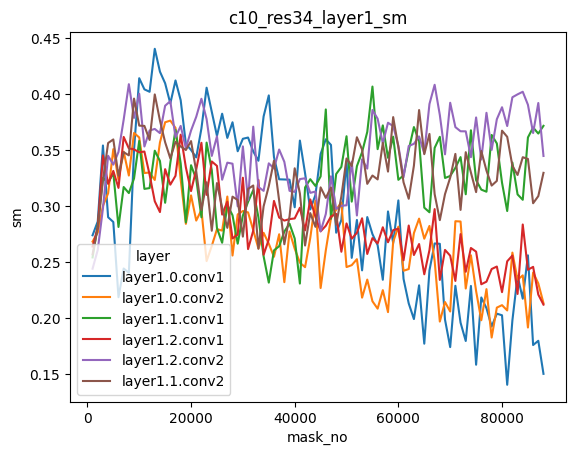

In [145]:
line_plot(dst_l_df, x="mask_no", y="sm", hue="layer", filter_by = ["layer1"], dst=destination, title='c10_res34_layer1_sm')

In [150]:
variables = ['sm', 'rm', 'sparsity', 'sw', 'rw', 't1m']
layers = ['layer1', 'layer2', 'layer3', 'layer4']
for layer in layers:
    for var in variables:
        line_plot(dst_l_df, x="mask_no", y=var, hue="layer", filter_by = [layer], dst=destination, title=f'c10_res34_{layer}_{var}')
        line_plot(dst_100_l_df, x="mask_no", y=var, hue="layer", filter_by = [layer], dst=destination, title=f'c100_res34_{layer}_{var}')

<Figure size 640x480 with 0 Axes>

In [151]:
dst = "../analysis/csv_files_2/original.csv"

In [152]:
dst_df = pd.read_csv(dst)

In [154]:
variables = ['copeland_score', 'compatibility', 'overlap_coefs']
layers = ['layer1', 'layer2', 'layer3', 'layer4']
for layer in layers:
    for var in variables:
        line_plot(dst_df, x="mask_no", y=var, hue="layer", filter_by = [layer], dst=destination, title=f'c10_res34_{layer}_{var}')

<Figure size 640x480 with 0 Axes>